In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from math import ceil
from pathlib import Path

# OSeMOSYS Global Capacity Expansion Results for Nepal

## Read in OSeMOSYS Results

In [2]:
annual_emissions = pd.read_csv('./Model/Results/AnnualEmissions.csv')
capital_investments = pd.read_csv('./Model/Results/CapitalInvestment.csv')
new_capacity = pd.read_csv('./Model/Results/NewCapacity.csv')
demand = pd.read_csv('./Model/Results/Demand.csv')
production_annual = pd.read_csv('./Model/Results/ProductionByTechnologyAnnual.csv')
total_capacity = pd.read_csv('./Model/Results/TotalCapacityAnnual.csv')

## Filter and Aggregate Results

In [3]:
capital_investments = capital_investments.loc[
    (capital_investments['TECHNOLOGY'].str.startswith('PWR')) &
    (capital_investments['TECHNOLOGY'].str[3:6] != "TRN")].reset_index(drop=True)
new_capacity = new_capacity.loc[
    (new_capacity['TECHNOLOGY'].str.startswith('PWR')) & 
    (new_capacity['TECHNOLOGY'].str[3:6] != "TRN")].reset_index(drop=True)
production_annual = production_annual.loc[
    (production_annual['TECHNOLOGY'].str.startswith('PWR')) & 
    (production_annual['TECHNOLOGY'].str[3:6] != "TRN")].reset_index(drop=True)
total_capacity = total_capacity.loc[
    (total_capacity['TECHNOLOGY'].str.startswith('PWR')) &
    (total_capacity['TECHNOLOGY'].str[3:6] != "TRN")].reset_index(drop=True)
demand = demand.groupby(by=['YEAR','FUEL','REGION']).sum().reset_index()

/tmp/ipykernel_18689/2551860266.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  demand = demand.groupby(by=['YEAR','FUEL','REGION']).sum().reset_index()


### Clean up dataframes for plotting

In [4]:
name_map = {
    "BIO":"Biomass",
    "COA":"Coal",
    "COG":"Cogeneration",
    "CCG":"CombinedCycleGas",
    "OCG":"OpenCycleGas",
    "GEO":"Geothermal",
    "HYD":"Hydro",
    "URN":"Nuclear",
    "OIL":"Oil",
    "OTH":"Other",
    "PET":"Petroleum",
    "SPV":"Solar",
    "WAS":"Waste",
    "WAV":"Wave",
    "WON":"Wind",
    "CSP":"Concentrated Solar",
    "WOF":"Wind",
    "ELC":"Electricity"
}

colour_map = {
    "BIO":"darkgreen",
    "CCG":"lightcoral",
    "COA":"black",
    "COG":"peru",
    "CSP":"wheat",
    "ELC":"yellow",
    "GAS":"orange",
    "GEO":"darkseagreen",
    "HYD":"dodgerblue",
    "OCG":"firebrick",
    "OIL":"lightgrey",
    "OTH":"teal",
    "PET":"grey",
    "SOL":"gold",
    "SPV":"gold",
    "URN":"mediumseagreen",
    "WAS":"darkkhaki",
    "WAV":"navy",
    "WOF":"violet",
    "WON":"blueviolet",
}

colour_map_full_name = {tech:colour_map[code] for code,tech in name_map.items()}

In [5]:
capital_investments["CODE"] = capital_investments["TECHNOLOGY"].str[3:6]
capital_investments["TECHNOLOGY"] = capital_investments["CODE"].map(name_map)

new_capacity["CODE"] = new_capacity["TECHNOLOGY"].str[3:6]
new_capacity["TECHNOLOGY"] = new_capacity["CODE"].map(name_map)

production_annual["CODE"] = production_annual["TECHNOLOGY"].str[3:6]
production_annual["TECHNOLOGY"] = production_annual["CODE"].map(name_map)

total_capacity["CODE"] = total_capacity["TECHNOLOGY"].str[3:6]
total_capacity["TECHNOLOGY"] = total_capacity["CODE"].map(name_map)

demand["CODE"] = demand["FUEL"].str[0:3]
demand["FUEL"] = demand["CODE"].map(name_map)

## Plot Results

### Installed Capacity 

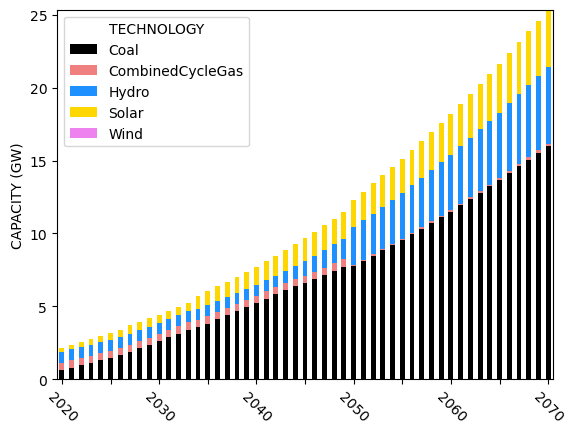

In [6]:
total_capacity_2 = total_capacity.pivot(index='YEAR',columns='TECHNOLOGY',values='VALUE')

ax = total_capacity_2.plot.bar( 
    stacked=True,
    color=colour_map_full_name
)

ax.set_ylabel('CAPACITY (GW)')
ax.set_xlabel('')
plt.locator_params(axis='x', nbins=11)
plt.xticks(rotation = -45)

for label in ax.xaxis.get_ticklabels()[1::2]:
    label.set_visible(False)

### Electricity Generation

In [7]:
def add_legend_line(legend):
    ax = legend.axes

    handles, labels = ax.get_legend_handles_labels()
    handles.append(mlines.Line2D([],[],color='k'))
    labels.append("Demand")
    for h,l in enumerate(labels):
        if l == 'VALUE':
            labels.remove(l)
            del handles[h]

    legend._legend_box = None
    legend._init_legend_box(handles, labels)
    legend._set_loc(legend._loc)
    legend.set_title(legend.get_title().get_text())

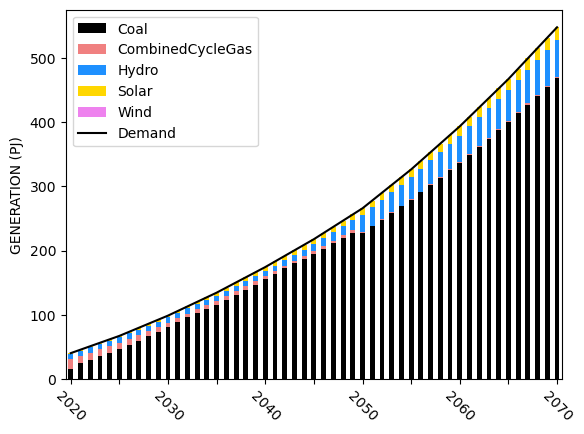

In [8]:
production_annual_2 = production_annual.pivot(index='YEAR',columns='TECHNOLOGY',values='VALUE')

ax = production_annual_2.plot.bar( 
    stacked=True,
    color=colour_map_full_name
)

xticks = ax.get_xticks()

demand['VALUE'].plot(
    x=xticks,
    ax=ax,
    color='k')

ax.set_ylabel('GENERATION (PJ)')
ax.set_xlabel('')
plt.locator_params(axis='x', nbins=11)
plt.xticks(rotation = -45)

for label in ax.xaxis.get_ticklabels()[1::2]:
    label.set_visible(False) 

legend = ax.legend()
add_legend_line(legend)

### Capital Investments 
Note, the spike in capital investments signals the retirment of technologies that are replaced with hydropower 

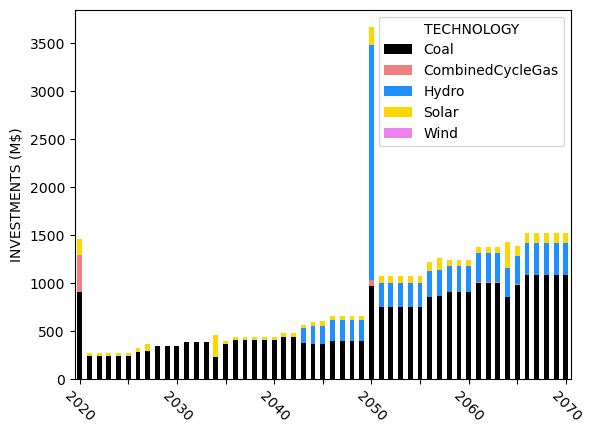

In [9]:
capital_investments_2 = capital_investments.pivot(index='YEAR',columns='TECHNOLOGY',values='VALUE')

ax = capital_investments_2.plot.bar( 
    stacked=True,
    color=colour_map_full_name
)

ax.set_ylabel('INVESTMENTS (M$)')
ax.set_xlabel('')
plt.locator_params(axis='x', nbins=11)
plt.xticks(rotation = -45)

for label in ax.xaxis.get_ticklabels()[1::2]:
    label.set_visible(False) 

### Emissions

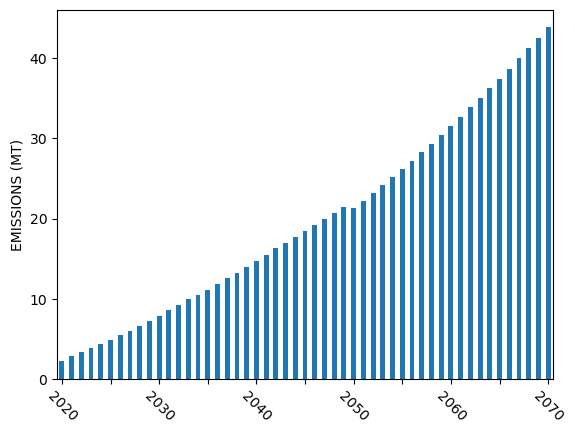

In [10]:
ax = annual_emissions.plot.bar( 
    x='YEAR',
    y='VALUE',
    legend=False
)

ax.set_ylabel('EMISSIONS (MT)')
ax.set_xlabel('')
plt.locator_params(axis='x', nbins=11)
plt.xticks(rotation = -45)

for label in ax.xaxis.get_ticklabels()[1::2]:
    label.set_visible(False) 

# GSA Results

## Read in GSA Sample Information

In [11]:
sample = np.loadtxt('./../../modelruns/0/morris_sample.txt', delimiter=",")
params = pd.read_csv('./../../config/parameters.csv')
df_sample = pd.DataFrame(sample, columns=params['group'].to_list())
df_sample = df_sample.loc[:,~df_sample.columns.duplicated()]

## Read in GSA Results

### Objective cost

In [12]:
cost_results = pd.read_csv('./GSA/Results/SA_objective.csv')
cost_results.columns.values[0]='names'
cost_results = cost_results.sort_values(['mu_star'], ascending=True)

### Model period emissions

In [13]:
emission_results = pd.read_csv('./GSA/Results/SA_Emissions.csv')
emission_results.columns.values[0]='names'
emission_results = emission_results.sort_values(['mu_star'], ascending=True)

### Renewable energy generation share in last year

In [14]:
reshare_results = pd.read_csv('./GSA/Results/SA_ReShare.csv')
reshare_results.columns.values[0]='names'
reshare_results = reshare_results.sort_values(['mu_star'], ascending=True)

### Append and sort mu* values

In [15]:
cost_results_2 = cost_results.copy()
cost_results_2 = cost_results_2.sort_values(['mu_star'], ascending=False)
cost_results_2 = cost_results_2[['names','mu_star']]
cost_results_2 = cost_results_2.set_index('names')

emission_results_2 = emission_results.copy()
emission_results_2 = emission_results_2[['names','mu_star']]
emission_results_2 = emission_results_2.set_index('names')

reshare_results_2 = reshare_results.copy()
reshare_results_2 = reshare_results_2[['names','mu_star']]
reshare_results_2 = reshare_results_2.set_index('names')

all_results = cost_results_2.join(emission_results_2, how='inner', rsuffix='_Emissions')
all_results = all_results.join(reshare_results_2, how='inner', lsuffix='_Cost', rsuffix='_Renewables')
columns = {x:x.split('_')[2] for x in all_results.columns}
index = [x.replace("_"," ") for x in all_results.index]
all_results = all_results.rename(columns=columns)
all_results.index = index

## Plot Results 

### mu* Results

In [16]:
def plot_mu_star(data, xlabel):
    data['names'] = data['names'].map(lambda x: x.replace("_"," "))
    labels = list(data['names'].unique())
    mu_star = data['mu_star'].to_list()
    mu_star_conf = data['mu_star_conf'].to_list()
    y = np.arange(len(labels))

    fig, ax = plt.subplots(figsize=(12,12))
    m_plt = ax.barh(
        y = y,
        width=mu_star,
        xerr=mu_star_conf,
        align="center",
        ecolor="black",
    )

    y_pos = np.arange(len(mu_star))
    ax.set_yticks(y_pos)
    lables = labels
    ax.set_yticklabels(labels)
    ax.set_xlabel(xlabel)

    ax.set_ylim(min(y_pos) - 1, max(y_pos) + 1)

    fig.tight_layout()

#### Objective Cost

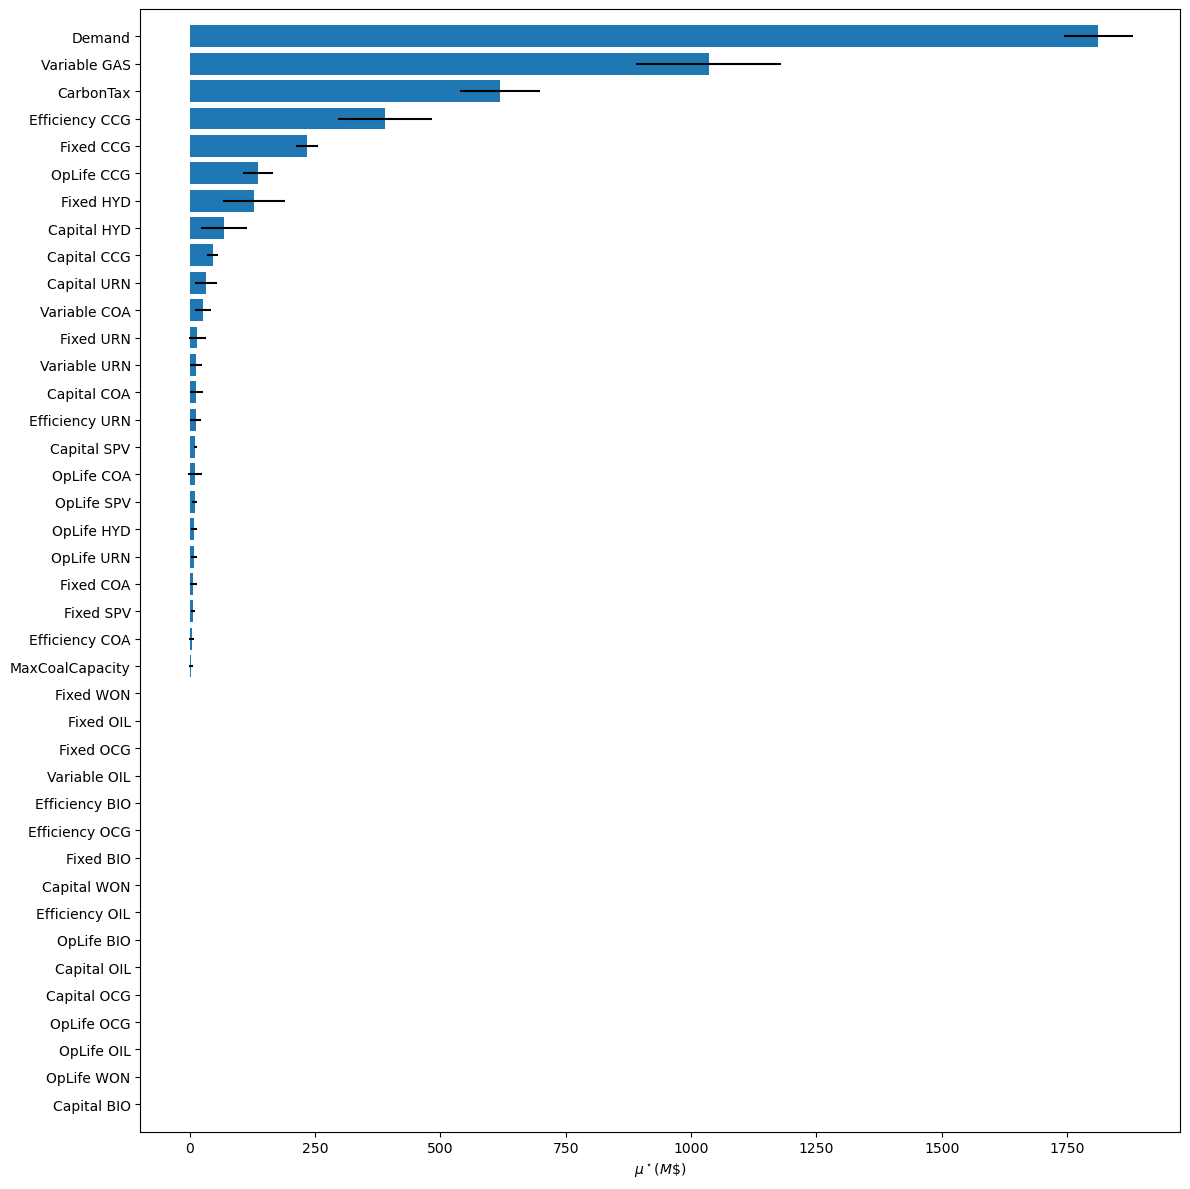

In [17]:
plot_mu_star(cost_results, r"$\mu^\star (M\$)$")

#### Model Period Emissions

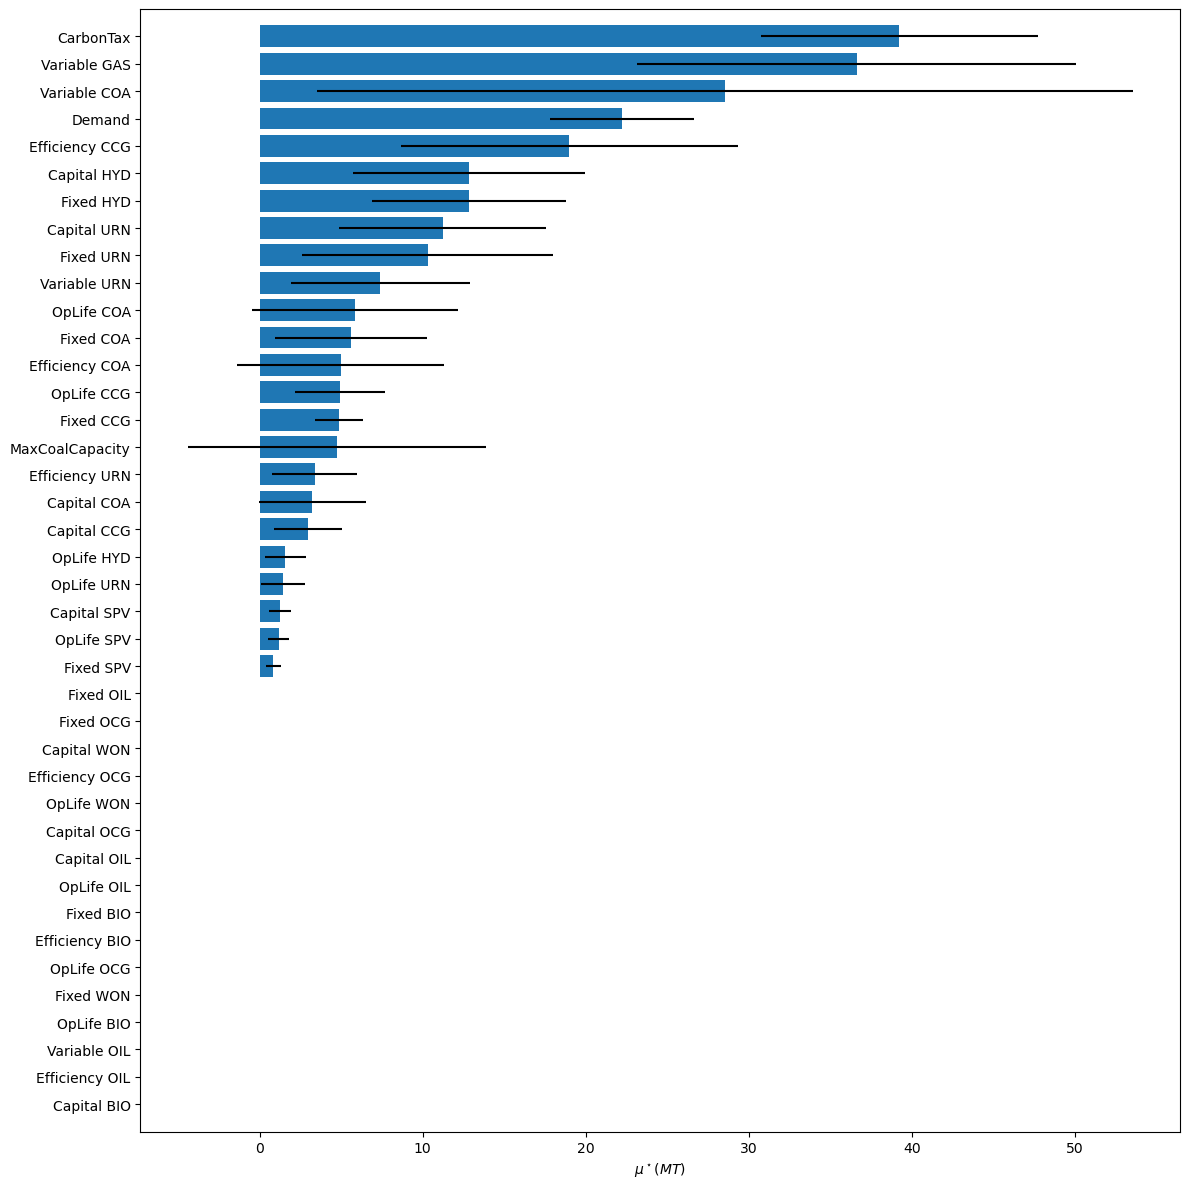

In [18]:
plot_mu_star(emission_results, r"$\mu^\star (MT)$")

#### Renewable energy generation share in last year

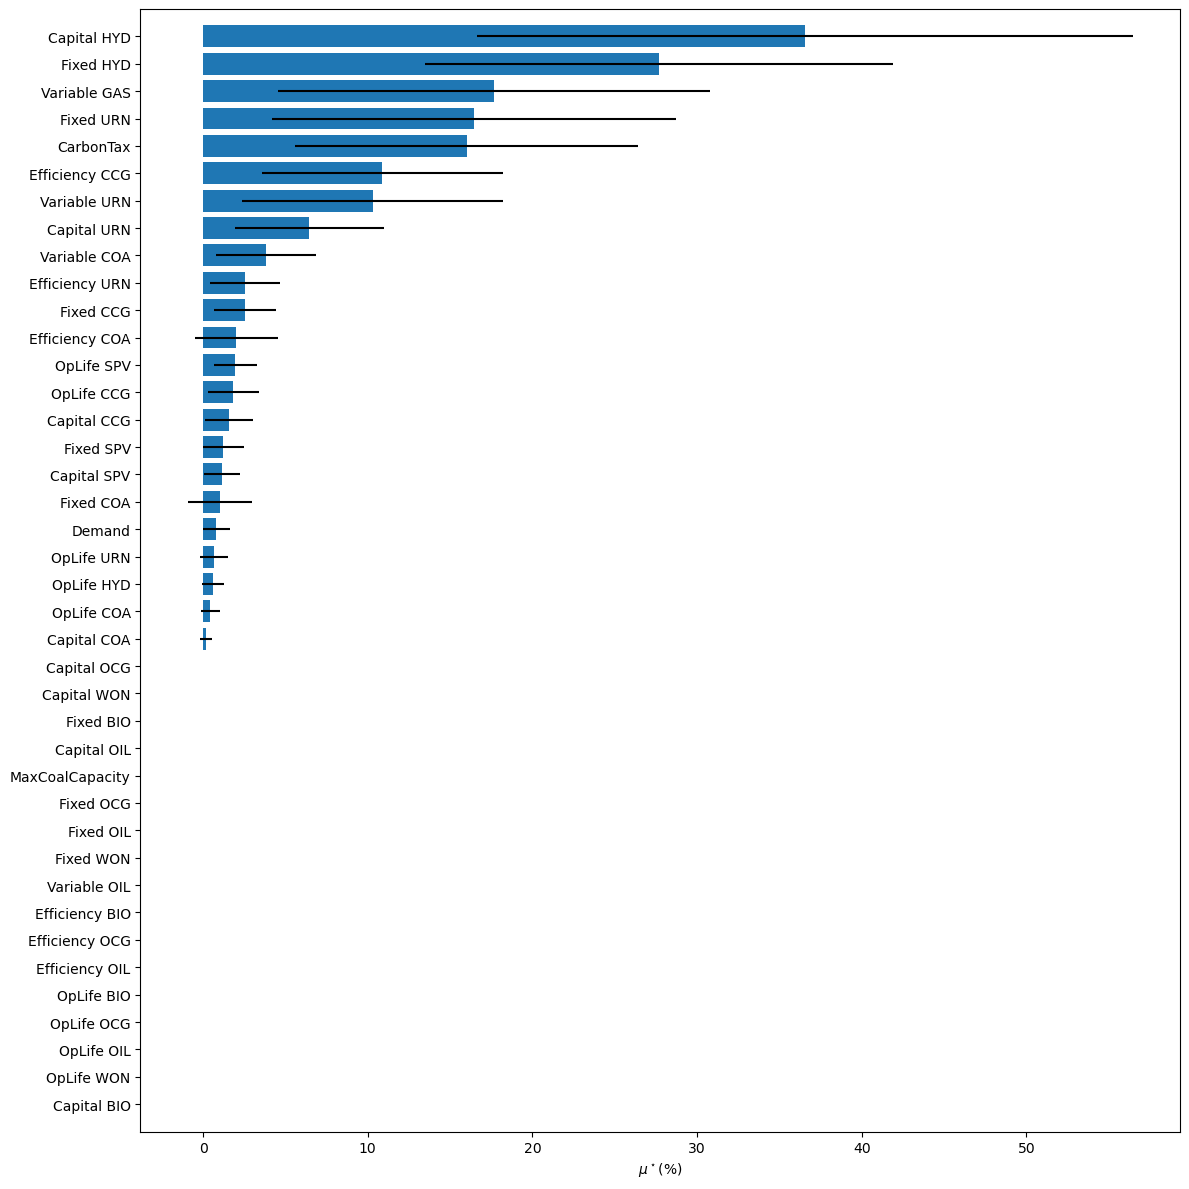

In [19]:
plot_mu_star(reshare_results, r"$\mu^\star (\%)$")

#### Comparison 

In [20]:
norm = (all_results - all_results.min()) / (all_results.max() - all_results.min()) * 100
norm2 = norm[['Renewables','Emissions','Cost']]
norm2 = norm2.iloc[::-1]

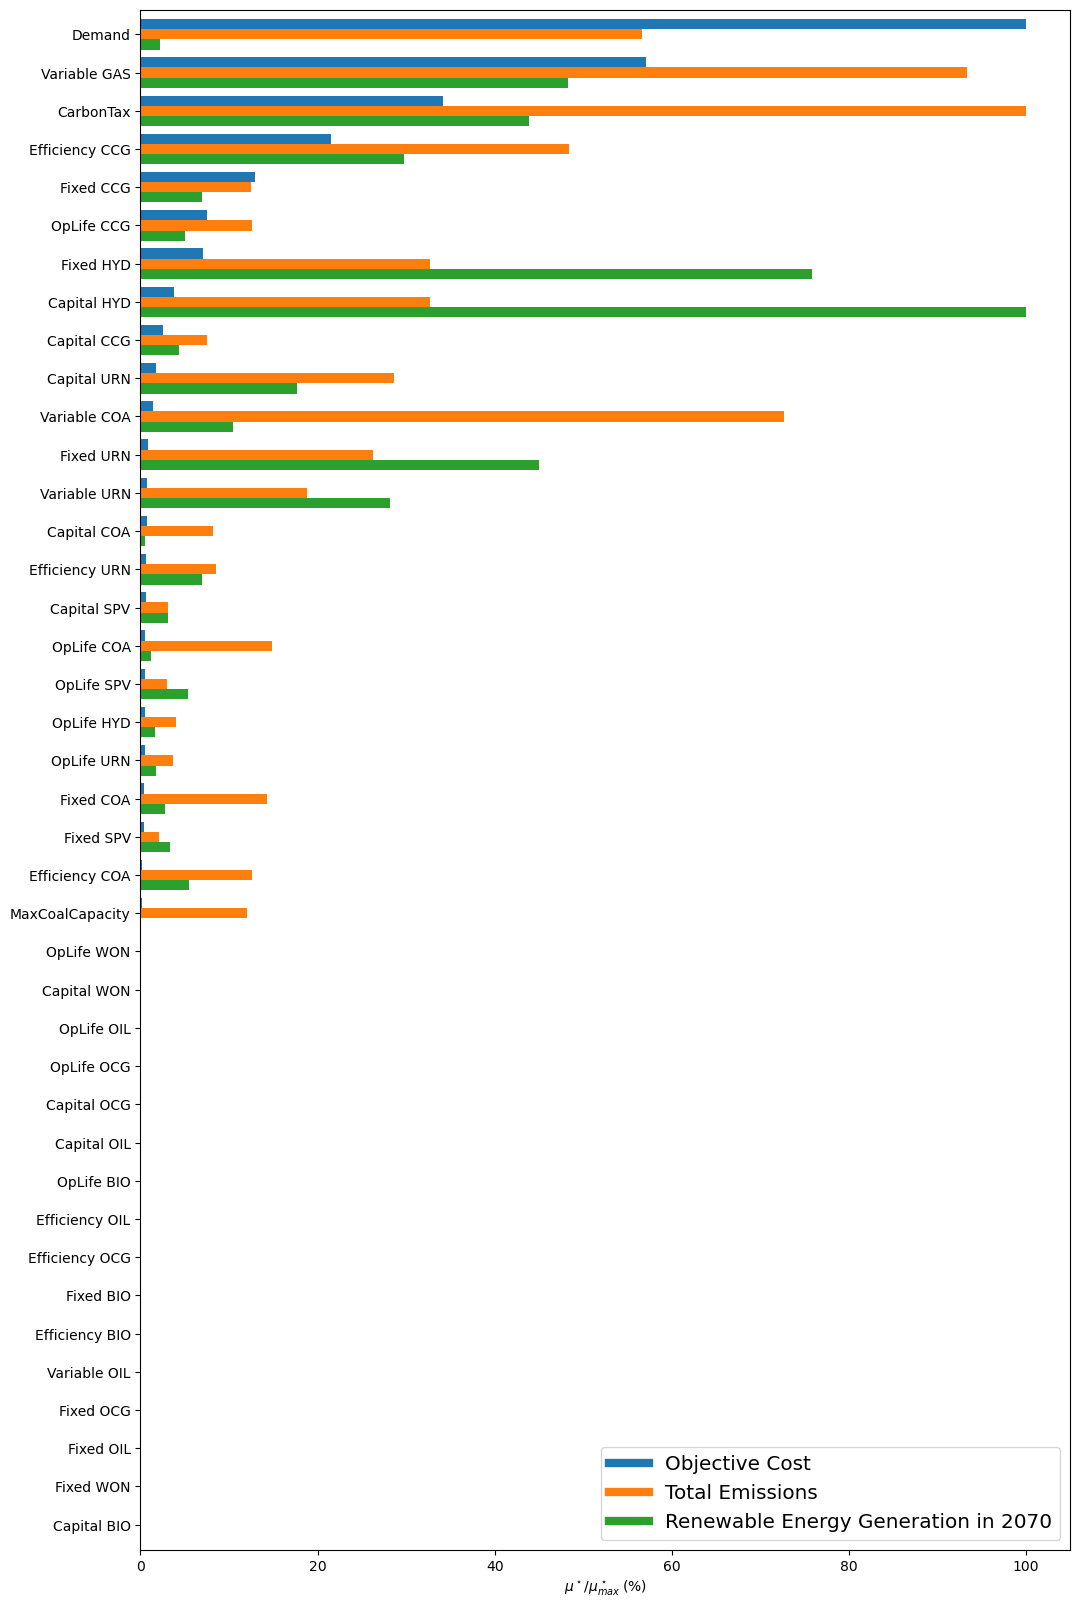

In [21]:
# labels = list(all_results['names'].unique())
# y = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(12,20))
norm2.plot.barh(
    ax=ax,
    width=0.8,
    color={"Renewables": "tab:green", "Emissions": "tab:orange", "Cost":"tab:blue"},
    xlabel=''
    )
ax.set_xlabel(r"${\mu^\star}/{\mu^\star_{max}}\:(\%)$")
# ax.legend(fontsize='x-large', loc='lower right')

custom_lines = [mlines.Line2D([0], [0], color="tab:blue", lw=6),
                mlines.Line2D([0], [0], color="tab:orange", lw=6),
                mlines.Line2D([0], [0], color="tab:green", lw=6)]
ax.legend(
    custom_lines, 
    ['Objective Cost', 'Total Emissions', 'Renewable Energy Generation in 2070'],
    fontsize='x-large',
    loc='lower right')

### Method of Morris for renewable energy generation share
Our GSA has 39 sensitivity parameters and 10 trajectories, resulting in (39+1)*10 model runs. Each trajectory group is shown below.   

#### Create master dataframe for all renewable energy generation share results

In [22]:
models = list(Path('./../../results/0/').glob("model_*"))
dfs = []
for model in models:
    model_num = model.parts[-1].split('_')[-1]
    df = pd.read_csv(Path(model,'results','ReShare.csv'))
    df["MODEL"] = model_num
    dfs.append(df)
renew = pd.concat(dfs).reset_index(drop=True)
renew['MODEL'] = renew['MODEL'].astype(int)

#### Extract out last year renewable energy share results

In [23]:
renew2070 = renew.loc[renew['YEAR'] == 2070]
renew2070 = renew2070.sort_values('MODEL')
renew2070 = renew2070.reset_index(drop=True)

#### Plot renewable energy generation share in all scenarios
The red bar highlights where demand changes in the method of morris

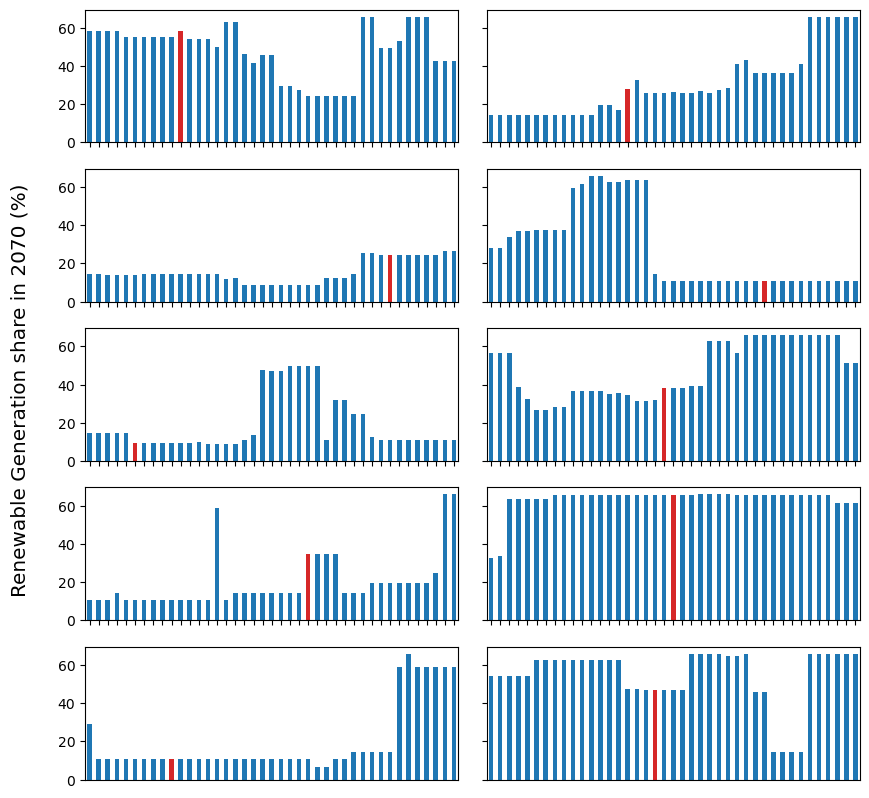

In [24]:
num_trajectories = int(len(df_sample) / len(df_sample.columns))
runs_per_trajectory = int(len(df_sample) / num_trajectories)
trajectories = {}
results = {}
for trajectory in range(num_trajectories):
    start = runs_per_trajectory * trajectory
    end = start + runs_per_trajectory - 1
    trajectories[trajectory] = df_sample.loc[start:end,:]
    results[trajectory] = renew2070.loc[start:end,:]

num_plots = len(trajectories)
num_rows = ceil(num_plots / 2)
fig, axs = plt.subplots(nrows=num_rows, ncols=2, sharex=True, sharey=True, figsize=(10,10), gridspec_kw = {'wspace':0.075, 'hspace':0.2})

row = 0
col = 0
for i, trajectory in trajectories.items():
    colour_change = np.where(np.diff(trajectory['Demand'], prepend=np.nan))[0][-1] + 1 # Where demand value changes 
    colours = ['tab:blue'] * runs_per_trajectory
    colours[colour_change] = 'tab:red'
    results[i]['VALUE'].plot.bar(
        ax = axs[row][col],
        color=colours,
    )
    col += 1
    if col > 1:
        col = 0
        row += 1

fig.supylabel('Renewable Generation share in 2070 (%)', fontsize='x-large', x=0.05)
axs[num_rows - 1, 0].get_xaxis().set_visible(False)
axs[num_rows - 1, 1].get_xaxis().set_visible(False)

#### Create master dataframe for all production by technology results 

In [25]:
models = list(Path('./../../results/0/').glob("model_*"))
dfs = []
for model in models:
    model_num = model.parts[-1].split('_')[-1]
    df = pd.read_csv(Path(model,'results','ProductionByTechnologyAnnual.csv'))
    df["MODEL"] = model_num
    dfs.append(df)
prod_by_tech = pd.concat(dfs).reset_index(drop=True)
prod_by_tech['MODEL'] = prod_by_tech['MODEL'].astype(int)

#### Group technologies and extract out last year results

In [26]:
tech_mapping = {
    'COAL':['COA'],
    'GAS':['CCG', 'OCG'],
    'NUCLEAR':['URN'],
    'HYDRO':['HYD'],
    'WIND':['WON', 'WOF'],
    'SOLAR':['SPV', 'CSP'],
    'BIO':['BIO'],
    'OTHER':['OTH','COG','GEO','OIL','PET','WAS','WAV']
}
tmap = {}
for k,v in tech_mapping.items():
    for i in v:
        tmap[i] = k

In [27]:
df_techs = prod_by_tech.loc[(prod_by_tech['TECHNOLOGY'].str.startswith('PWR')) & (prod_by_tech['YEAR']==2070) & ((prod_by_tech['VALUE']>0.0))]
df_techs2 = df_techs.copy()
df_techs2['TECH'] = df_techs2['TECHNOLOGY'].str[3:6]
df_techs2['LABEL'] = df_techs2['TECH'].map(tmap)
df_techs2['VALUE'] = df_techs2['VALUE'].astype(float)
df_techs2 = df_techs2[['LABEL','MODEL','VALUE']]
df_gen = df_techs2.groupby(by=['LABEL','MODEL']).sum()
df_gen = df_gen.reset_index()

#### Plot all model runs

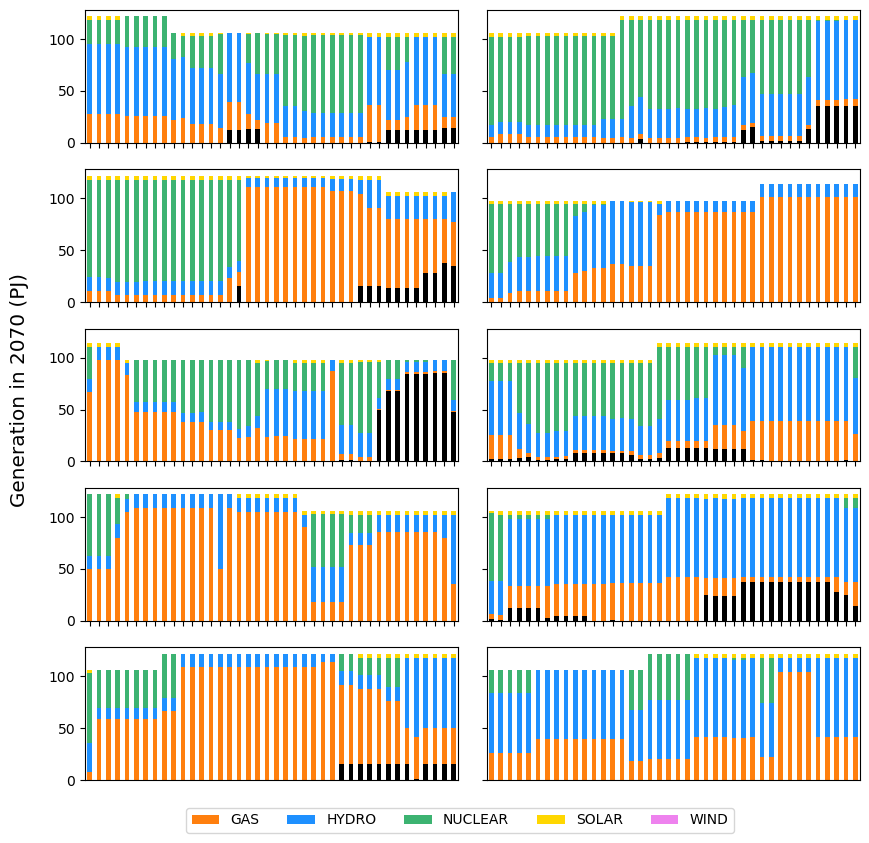

In [28]:
num_trajectories = int(len(df_sample) / len(df_sample.columns))
runs_per_trajectory = int(len(df_sample) / num_trajectories)

gen_per_trajectory = {}
for trajectory in range(num_trajectories):
    start = runs_per_trajectory * trajectory
    end = start + runs_per_trajectory - 1
    models = range(start,end)
    df_gen_traj = df_gen.loc[df_gen['MODEL'].isin(models)]
    gen_per_trajectory[trajectory] = df_gen_traj.pivot(index='MODEL', columns='LABEL', values='VALUE')
    
num_plots = len(trajectories)
num_rows = ceil(num_plots / 2)
fig, axs = plt.subplots(nrows=num_rows, ncols=2, sharex=True, sharey=True, figsize=(10,10), gridspec_kw = {'wspace':0.075, 'hspace':0.2})
colours = {
    'COAL':'black',
    'GAS':'tab:orange',
    'HYDRO':'dodgerblue',
    'NUCLEAR':'mediumseagreen',
    'SOLAR':'gold',
    'WIND':'violet',
    'OTHER':'teal',
    'BIO':'darkgreen'
}
row = 0
col = 0
for i, trajectory in trajectories.items():
    gen_per_trajectory[i].plot.bar(
        ax = axs[row][col],
        stacked=True,
        color=colours,
        xlabel='',
        ylabel='',
        legend=None
    )
    col += 1
    if col > 1:
        col = 0
        row += 1
handles, labels = axs[-1][-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=7, bbox_to_anchor=(0.5,0.05))
fig.supylabel('Generation in 2070 (PJ)', fontsize='x-large', x=0.05)
axs[num_rows - 1, 0].get_xaxis().set_visible(False)
axs[num_rows - 1, 1].get_xaxis().set_visible(False)
